In [194]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from yahoofinancials import YahooFinancials
from yahooquery import Ticker
from yahooquery import screener

In [195]:
print('Ratios presented')
print('Leverage')
print(' :Debt to Assets')
print(' :Debt to Equity')
print(' :Asset to Equity')
print('Profitability')
print(' :Gross Profit Margin')
print(' :Return on Equity')
print(' :Return on Assets')
print(' :Operating Profit Margin')
print('Coverage')
print(' :Interest Coverage')
print(' :Cash Coverage')
print(' :Asset Coverage')
print('Liquidity')
print(' :Current Ratio')
print(' :Cash Ratio')

Ratios presented
Leverage
 :Debt to Assets
 :Debt to Equity
 :Asset to Equity
Profitability
 :Gross Profit Margin
 :Return on Equity
 :Return on Assets
 :Operating Profit Margin
Coverage
 :Interest Coverage
 :Cash Coverage
 :Asset Coverage
Liquidity
 :Current Ratio
 :Cash Ratio


In [196]:
#Equity Ticker to compare
t1 = 'nflx'
t2 = 'amzn'
t3 = 'dis'

In [197]:
#Ticker to analyze
ticker = Ticker(t1)
#get balance sheet for ticker
ticker_Bal = ticker.balance_sheet()
#ticker_Bal['Date'] = ticker_Bal['asOfDate'].dt.strftime('%m-%Y') 
#ticker_Bal['Date'] = ticker_Bal['asOfDate'].dt.strftime('%m-%Y')
#Get cash flow for ticker
ticker_cash = ticker.cash_flow()
#ticker_cash['Date'] = ticker_cash['asOfDate'].dt.strftime('%m-%Y')
#Get income statement for ticker
ticker_income = ticker.income_statement()
#ticker_income['Date'] = ticker_income['asOfDate'].dt.strftime('%m-%Y')
#Print the col(series) for the balance sheet
#for col in ticker_Bal.columns:
     #print(col)

In [198]:
#Create a DF of the financial statements
df = [ticker_Bal,ticker_cash,ticker_income]
#Concatenate the DF together easier for pulling series for the Ratios
df_joined = pd.concat(df)
#print(df_joined['Date'])

In [199]:
print('Leverage Ratios')
#It can be interpreted as the proportion of a company’s assets that are financed by debt as a percentage.
df_joined['Debt/Assets'] = (df_joined['TotalDebt'] / df_joined['TotalAssets'])*100
# indicates how much debt is used to carry a firm's assets.
df_joined['Debt/Equity'] = (df_joined['TotalDebt'] / df_joined['StockholdersEquity']) #It shows the ratio between the total assets of the company to the amount on which equity holders have a claim.
df_joined['Asset/Equity'] = (df_joined['TotalAssets'] / df_joined['StockholdersEquity'])
#print(df_joined[['asOfDate','Debt/Assets','Debt/Equity','Asset/Equity']].head(4))
print('Profitability')
#for the Series StockholdersEquity take the mean 
avg_share_equity = df_joined['StockholdersEquity'].mean()
#Gross profit margin is a metric analysts use to assess a company's financial health by calculating the amount of money left over from product sales after subtracting the cost of goods sold (COGS) as a percentage
df_joined['Gross_Margin'] = ((df_joined['TotalRevenue'] - df_joined['CostOfRevenue']) / df_joined['TotalRevenue'])*100
#Return on equity (ROE) measures how the profitability of a corporation in relation to stockholders’ equity
df_joined['ROE'] = (df_joined['NetIncome'] / avg_share_equity)*100
ticker_income['ROE'] = (ticker_income['NetIncome'] / avg_share_equity) *100
#print(ticker_income[['asOfDate' , 'ROE']])
#measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.
df_joined['Operating_Margin'] = (df_joined['EBIT'] / df_joined['TotalRevenue'])*100
#Print the results
#print(df_joined[['asOfDate','Gross_Margin','ROE','Operating_Margin']].tail(6))
#ROA breakdown
ROA = (ticker_income['NetIncome'] / ticker_Bal['TotalAssets']) *100
#previous 6 quarters
#print(ROA.tail(6))
print('Coverage Ratios')
df_joined['Interest_coverage'] = (df_joined['EBIT'] / df_joined['InterestExpense'])
#print(df_joined[['asOfDate','Interest_coverage']].tail(6))
#Cash_Coverage
ticker_income['Cash_coverage'] = (ticker_income['EBIT'] + ticker_income['ReconciledDepreciation'])/ ticker_income['InterestExpense']
#print(ticker_income[['asOfDate','Cash_coverage']])
ticker_Bal['Asset_coverage'] = (ticker_Bal['TotalAssets'] - ticker_Bal['CurrentLiabilities'] )/ ticker_Bal['TotalDebt']
#print(ticker_Bal[['asOfDate','Asset_coverage']])
print('Liquidity Ratios')
df_joined['Current_ratio'] = df_joined['CurrentAssets'] / df_joined['CurrentLiabilities']
df_joined['Cash_ratio'] = df_joined['CashAndCashEquivalents'] / df_joined['CurrentLiabilities'] * 100
#print(df_joined[['asOfDate','Current_ratio','Cash_ratio']].head(4))

Leverage Ratios
Profitability
Coverage Ratios
Liquidity Ratios


In [200]:
#Print the col(series) for the cash flow
#for col in ticker_cash.columns:
     #print(col)

In [201]:
#Print the col(series) for the income statement
#for col in ticker_income.columns:
     #print(col)

In [202]:
#Print the series of the joined DF
#for col in df_joined.columns:
     #print(col)

In [203]:
#plt.plot(df_joined3['asOfDate'],df_joined3['Debt/Assets'])
#plt.xlabel('Date')
#plt.ylabel('Debt to Assets')

In [204]:
#plt.plot(df_joined['asOfDate'],df_joined['Debt/Equity'])
#plt.xlabel('Date')
#plt.ylabel('Debt to Equity')

In [205]:
#plt.plot(df_joined['asOfDate'],df_joined['Asset/Equity'])
#plt.xlabel('Date')
#plt.ylabel('Asset to Equity')

In [206]:
#plt.plot(df_joined['asOfDate'],df_joined['Gross_Margin'])
#plt.xlabel('Date')
#plt.ylabel('Gross Margin')

In [207]:
#plt.plot(ticker_income['asOfDate'],ticker_income['ROE'])
#plt.xlabel('Date')
#plt.ylabel('Return on Equity')
#line is avg shareholder equity

In [208]:
#plt.plot(df_joined['asOfDate'], df_joined['Operating_Margin'])
#plt.xlabel('Date')
#plt.ylabel('Operating profit margin')

In [209]:
#plt.plot(df_joined['asOfDate'],df_joined['Interest_coverage'])
#plt.xlabel('Date')
#plt.ylabel('Interest Coverage')

In [210]:
#plt.plot(ticker_income['asOfDate'],ticker_income['Cash_coverage'])
#plt.xlabel('Date')
#plt.ylabel('Cash Coverage')

In [211]:
#plt.plot(ticker_Bal['asOfDate'],ticker_Bal['Asset_coverage'])
#plt.xlabel('Date')
#plt.ylabel('Asset Coverage')

In [212]:
#plt.plot(df_joined['asOfDate'],df_joined['Current_ratio'])
#plt.xlabel('Date')
#plt.ylabel('Current Ratio')

In [213]:
#plt.plot(df_joined['asOfDate'],df_joined['Cash_ratio'])
#plt.xlabel('Date')
#plt.ylabel('Cash_Ratio')

In [214]:
#Create ticker 2 so that way can compare
ticker2 = Ticker(t2)
#get balance sheet for ticker
ticker_Bal2 = ticker2.balance_sheet()
#ticker_Bal2['Date'] = ticker_Bal2['asOfDate'].dt.strftime('%m-%Y')
#Get cash flow for ticker
ticker_cash2 = ticker2.cash_flow()
#ticker_cash2['Date'] = ticker_cash2['asOfDate'].dt.strftime('%m-%Y')
#Get income statement for ticker
ticker_income2 = ticker2.income_statement()
#ticker_income2['Date'] = ticker_income['asOfDate'].dt.strftime('%m-%Y')

In [215]:
df2 = [ticker_Bal2,ticker_cash2,ticker_income2]
#Concatenate the DF together easier for pulling series for the Ratios
df_joined2 = pd.concat(df2)
#print(df_joined2['Date'])

In [216]:
print('Leverage Ratios')
#It can be interpreted as the proportion of a company’s assets that are financed by debt as a percentage.
df_joined2['Debt/Assets'] = (df_joined2['TotalDebt'] / df_joined2['TotalAssets'])*100
# indicates how much debt is used to carry a firm's assets.
df_joined2['Debt/Equity'] = (df_joined2['TotalDebt'] / df_joined2['StockholdersEquity']) #It shows the ratio between the total assets of the company to the amount on which equity holders have a claim.
df_joined2['Asset/Equity'] = (df_joined2['TotalAssets'] / df_joined2['StockholdersEquity'])
#print(df_joined2[['asOfDate','Debt/Assets','Debt/Equity','Asset/Equity']].head(4))

print('Profitability')
#for the Series StockholdersEquity take the mean 
avg_share_equity2 = df_joined2['StockholdersEquity'].mean()
#Gross profit margin is a metric analysts use to assess a company's financial health by calculating the amount of money left over from product sales after subtracting the cost of goods sold (COGS) as a percentage
df_joined2['Gross_Margin'] = ((df_joined2['TotalRevenue'] - df_joined2['CostOfRevenue']) / df_joined2['TotalRevenue'])*100
#Return on equity (ROE) measures how the profitability of a corporation in relation to stockholders’ equity
ticker_income2['ROE'] = (ticker_income2['NetIncome']/ avg_share_equity2) *100
#print(ticker_income2[['asOfDate' , 'ROE']])
#measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.
df_joined2['Operating_Margin'] = (df_joined2['EBIT'] / df_joined2['TotalRevenue'])*100
#Print the results
#print(ticker_income2[['asOfDate' , 'ROE']])
#print(df_joined2[['asOfDate','Gross_Margin','Operating_Margin']].tail(6))
ROA2 = ticker_income2['NetIncome'] / ticker_Bal2['TotalAssets']
#previous 6 quarters
#print(ROA2.tail(6))

print('Coverage Ratios')
df_joined2['Interest_coverage'] = (df_joined2['EBIT'] / df_joined2['InterestExpense'])
#print(df_joined2[['asOfDate','Interest_coverage']].tail(6))
ticker_income2['Cash_coverage'] = (ticker_income2['EBIT'] + ticker_income2['ReconciledDepreciation'])/ ticker_income2['InterestExpense']
#print(ticker_income2[['asOfDate','Cash_coverage']])
ticker_Bal2['Asset_coverage'] = (ticker_Bal2['TotalAssets'] - ticker_Bal2['CurrentLiabilities'] )/ ticker_Bal2['TotalDebt']
#print(ticker_Bal2[['asOfDate','Asset_coverage']])

print('Liquidity Ratios')
df_joined2['Current_ratio'] = df_joined2['CurrentAssets'] / df_joined2['CurrentLiabilities']
df_joined2['Cash_ratio'] = df_joined2['CashAndCashEquivalents'] / df_joined2['CurrentLiabilities'] * 100
#print(df_joined2[['asOfDate','Current_ratio','Cash_ratio']].head(4))

Leverage Ratios
Profitability
Coverage Ratios
Liquidity Ratios


In [217]:
#Create ticker 2 so that way can compare
ticker3 = Ticker(t3)
#get balance sheet for ticker
ticker_Bal3 = ticker3.balance_sheet()
#ticker_Bal3['Date'] = ticker_Bal3['asOfDate'].dt.strftime('%m-%Y')
#Get cash flow for ticker
ticker_cash3 = ticker3.cash_flow()
#ticker_cash3['Date'] = ticker_cash3['asOfDate'].dt.strftime('%m-%Y')
#Get income statement for ticker
ticker_income3 = ticker3.income_statement()
#ticker_income3['Date'] = ticker_income['asOfDate'].dt.strftime('%m-%Y')

In [218]:
df3 = [ticker_Bal3,ticker_cash3,ticker_income3]
#Concatenate the DF together easier for pulling series for the Ratios
df_joined3 = pd.concat(df3)
#print(df_joined3['Date'])

In [219]:
print('Leverage Ratios')
#It can be interpreted as the proportion of a company’s assets that are financed by debt as a percentage.
df_joined3['Debt/Assets'] = (df_joined3['TotalDebt'] / df_joined3['TotalAssets'])*100
# indicates how much debt is used to carry a firm's assets.
df_joined3['Debt/Equity'] = (df_joined3['TotalDebt'] / df_joined3['StockholdersEquity']) #It shows the ratio between the total assets of the company to the amount on which equity holders have a claim.
df_joined3['Asset/Equity'] = (df_joined3['TotalAssets'] / df_joined3['StockholdersEquity'])
#print(df_joined3[['asOfDate','Debt/Assets','Debt/Equity','Asset/Equity']].head(4))

print('Profitability')
#for the Series StockholdersEquity take the mean 
avg_share_equity3 = df_joined3['StockholdersEquity'].mean()
#Gross profit margin is a metric analysts use to assess a company's financial health by calculating the amount of money left over from product sales after subtracting the cost of goods sold (COGS) as a percentage
df_joined3['Gross_Margin'] = ((df_joined3['TotalRevenue'] - df_joined3['CostOfRevenue']) / df_joined3['TotalRevenue'])*100
#Return on equity (ROE) measures how the profitability of a corporation in relation to stockholders’ equity
ticker_income3['ROE'] = (ticker_income3['NetIncome'] / avg_share_equity3) * 100
#print(ticker_income3[['asOfDate' , 'ROE']])
#measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.
df_joined3['Operating_Margin'] = (df_joined3['EBIT'] / df_joined3['TotalRevenue'])*100
#Print the results
#print(df_joined3[['asOfDate','Gross_Margin','Operating_Margin']].tail(6))
ROA3 = ticker_income3['NetIncome'] / ticker_Bal3['TotalAssets']
#previous 6 quarters

#print(ROA3.tail(6))
print('Coverage Ratios')
df_joined3['Interest_coverage'] = (df_joined3['EBIT'] / df_joined3['InterestExpense'])
#print(df_joined3[['asOfDate','Interest_coverage']].tail(6))
ticker_income3['Cash_coverage'] = (ticker_income3['EBIT'] + ticker_income3['ReconciledDepreciation'])/ ticker_income3['InterestExpense']
#print(ticker_income3[['asOfDate','Cash_coverage']])
ticker_Bal3['Asset_coverage'] = (ticker_Bal3['TotalAssets'] - ticker_Bal3['CurrentLiabilities'] )/ ticker_Bal3['TotalDebt']
#print(ticker_Bal3[['asOfDate','Asset_coverage']])

print('Liquidity Ratios')
df_joined3['Current_ratio'] = df_joined3['CurrentAssets'] / df_joined3['CurrentLiabilities']
df_joined3['Cash_ratio'] = df_joined3['CashAndCashEquivalents'] / df_joined3['CurrentLiabilities'] * 100
print(df_joined3[['asOfDate','Current_ratio','Cash_ratio']].head(4))

Leverage Ratios
Profitability
Coverage Ratios
Liquidity Ratios
         asOfDate  Current_ratio  Cash_ratio
symbol                                      
dis    2017-09-30       0.810870   20.500128
dis    2018-09-30       0.942049   23.236282
dis    2019-09-30       0.897355   17.287260
dis    2020-09-30       1.323832   67.275049


In [220]:
print('Comparision')
print('The Debt to Assets for the Tickers are:',df_joined['Debt/Assets'].head(4),df_joined2['Debt/Assets'].head(4),df_joined3['Debt/Assets'].head(4))

Comparision
The Debt to Assets for the Tickers are: symbol
nflx    34.184612
nflx    39.885649
nflx    43.440620
nflx    41.519409
Name: Debt/Assets, dtype: float64 symbol
amzn    28.882796
amzn    24.462028
amzn    28.060183
amzn    26.273448
Name: Debt/Assets, dtype: float64 symbol
dis    26.402823
dis    21.170815
dis    24.221585
dis    29.088708
Name: Debt/Assets, dtype: float64


In [221]:
print('The Debt to Equity for the Tickers are:',df_joined['Debt/Equity'].head(4),df_joined2['Debt/Equity'].head(4),df_joined3['Debt/Equity'].head(4))

The Debt to Equity for the Tickers are: symbol
nflx    1.814492
nflx    1.977576
nflx    1.946578
nflx    1.473892
Name: Debt/Equity, dtype: float64 symbol
amzn    1.368725
amzn    0.913615
amzn    1.018450
amzn    0.903484
Name: Debt/Equity, dtype: float64 symbol
dis    0.612151
dis    0.427983
dis    0.528663
dis    0.701435
Name: Debt/Equity, dtype: float64


In [222]:
print('The Asset to Equity for the Tickers are:',df_joined['Asset/Equity'].head(4),df_joined2['Asset/Equity'].head(4),df_joined3['Asset/Equity'].head(4))

The Asset to Equity for the Tickers are: symbol
nflx    5.307922
nflx    4.958115
nflx    4.481009
nflx    3.549888
Name: Asset/Equity, dtype: float64 symbol
amzn    4.738894
amzn    3.734827
amzn    3.629520
amzn    3.438771
Name: Asset/Equity, dtype: float64 symbol
dis    2.318504
dis    2.021569
dis    2.182612
dis    2.411364
Name: Asset/Equity, dtype: float64


In [223]:
print('The Gross Margin for the Tickers are:',df_joined['Gross_Margin'].tail(6),df_joined2['Gross_Margin'].tail(6),df_joined3['Gross_Margin'].tail(6))

The Gross Margin for the Tickers are: symbol
nflx          NaN
nflx    34.491969
nflx    36.891713
nflx    38.281717
nflx    38.885083
nflx    38.885083
Name: Gross_Margin, dtype: float64 symbol
amzn    22.872837
amzn    25.636467
amzn    26.648177
amzn    25.448596
amzn    24.410460
amzn    24.410460
Name: Gross_Margin, dtype: float64 symbol
dis    45.035094
dis    44.937241
dis    39.603277
dis    38.724792
dis    32.892886
dis    29.853522
Name: Gross_Margin, dtype: float64


In [224]:
print('The Return on Assets for the Tickers are:',ROA.tail(6),ROA2.tail(6),ROA3.tail(6))

The Return on Assets for the Tickers are: symbol
nflx     8.127556
nflx     7.029964
nflx    14.523918
nflx    10.631218
nflx     8.127556
nflx     7.029964
dtype: float64 symbol
amzn    0.094700
amzn    0.066411
amzn    0.162448
amzn    0.131148
amzn    0.094700
amzn    0.066411
dtype: float64 symbol
dis   -0.014764
dis   -0.014210
dis   -0.051718
dis   -0.050244
dis   -0.025538
dis   -0.024580
dtype: float64


In [225]:
print('The Return on Equity for the Tickers are:',ticker_income['ROE'],ticker_income2['ROE'],ticker_income3['ROE'])

The Return on Equity for the Tickers are: symbol
nflx     8.139313
nflx    17.638515
nflx    27.186661
nflx    40.212365
nflx    40.212365
Name: ROE, dtype: float64 symbol
amzn     5.351047
amzn    17.771544
amzn    20.444421
amzn    23.253147
amzn    37.633754
amzn    37.633754
Name: ROE, dtype: float64 symbol
dis    13.681308
dis    19.193443
dis    16.841111
dis    15.803586
dis    -4.363393
dis    -7.547572
Name: ROE, dtype: float64


In [226]:
print('The operating profit margin for the Tickers are:',df_joined['Operating_Margin'].tail(6),df_joined2['Operating_Margin'].tail(6),df_joined3['Operating_Margin'].tail(6))

The operating profit margin for the Tickers are: symbol
nflx          NaN
nflx     7.172664
nflx    10.427475
nflx    13.336944
nflx    18.344050
nflx    18.344050
Name: Operating_Margin, dtype: float64 symbol
amzn    2.616577
amzn    5.443842
amzn    5.552506
amzn    5.576757
amzn    6.689305
amzn    6.689305
Name: Operating_Margin, dtype: float64 symbol
dis    25.926329
dis    25.929603
dis    21.834124
dis    19.420965
dis    -0.146816
dis    -4.335089
Name: Operating_Margin, dtype: float64


In [227]:
print('The Interest Coverage for the Tickers are:',df_joined['Interest_coverage'].tail(6),df_joined2['Interest_coverage'].tail(6),df_joined3['Interest_coverage'].tail(6))

The Interest Coverage for the Tickers are: symbol
nflx         NaN
nflx    2.373454
nflx    3.916714
nflx    4.294178
nflx    3.308433
nflx    3.308433
Name: Interest_coverage, dtype: float64 symbol
amzn     5.488208
amzn     8.947071
amzn     9.735000
amzn    10.836353
amzn    15.680024
amzn    15.680024
Name: Interest_coverage, dtype: float64 symbol
dis    28.195266
dis    22.596774
dis    12.191011
dis    10.096886
dis    -0.058288
dis    -1.559503
Name: Interest_coverage, dtype: float64


In [228]:
print('The Cash Coverage for the Tickers are:',ticker_income['Cash_coverage'],ticker_income2['Cash_coverage'],ticker_income3['Cash_coverage'])

The Cash Coverage for the Tickers are: symbol
nflx    20.288387
nflx    22.125001
nflx    19.181532
nflx    11.189453
nflx    11.189453
Name: Cash_coverage, dtype: float64 symbol
amzn    19.023585
amzn    19.773465
amzn    23.353125
amzn    24.630435
amzn    31.011536
amzn    31.011536
Name: Cash_coverage, dtype: float64 symbol
dis    33.682446
dis    27.011730
dis    15.529695
dis    13.367474
dis     3.187007
dis     1.604500
Name: Cash_coverage, dtype: float64


In [229]:
print('The Asset Coverage for the Tickers are:',ticker_Bal['Asset_coverage'],ticker_Bal2['Asset_coverage'],ticker_Bal3['Asset_coverage'])

The Asset Coverage for the Tickers are: symbol
nflx    2.084248
nflx    1.880982
nflx    1.837492
nflx    1.929893
Name: Asset_coverage, dtype: float64 symbol
amzn    1.936060
amzn    2.369040
amzn    2.174448
amzn    2.308476
Name: Asset_coverage, dtype: float64 symbol
dis    3.012692
dis    3.867874
dis    3.461520
dis    2.983574
Name: Asset_coverage, dtype: float64


In [230]:
print('The Current Ratio for the Tickers are:',df_joined['Current_ratio'].head(4),df_joined2['Current_ratio'].head(4),df_joined3['Current_ratio'].head(4))

The Current Ratio for the Tickers are: symbol
nflx    1.403135
nflx    1.494320
nflx    0.901222
nflx    1.250557
Name: Current_ratio, dtype: float64 symbol
amzn    1.039977
amzn    1.098112
amzn    1.097048
amzn    1.050227
Name: Current_ratio, dtype: float64 symbol
dis    0.810870
dis    0.942049
dis    0.897355
dis    1.323832
Name: Current_ratio, dtype: float64


In [249]:
print('The Cash Ratio for the Tickers are:',df_joined3[['asOfDate','Cash_ratio']].head(4))

The Cash Ratio for the Tickers are:          asOfDate  Cash_ratio
symbol                       
dis    2017-09-30   20.500128
dis    2018-09-30   23.236282
dis    2019-09-30   17.287260
dis    2020-09-30   67.275049


In [232]:
#since this is getting used as the x-axis no need to create a date series for the other two df, in addition these series will be used to clean up the x-axis
df_joined['Date'] = df_joined['asOfDate'].dt.strftime('%m-%Y')
ticker_Bal['Date'] = ticker_Bal['asOfDate'].dt.strftime('%m-%Y')
ticker_income['Date'] = ticker_income['asOfDate'].dt.strftime('%m-%Y')

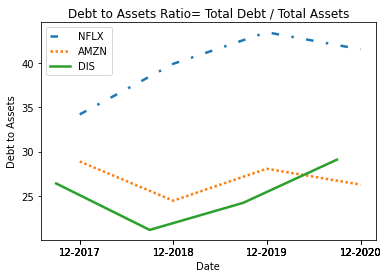

In [233]:
#search linestyles for different styles
plt.plot(df_joined['asOfDate'],df_joined['Debt/Assets'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)), linewidth = 2.5)
plt.plot(df_joined2['asOfDate'],df_joined2['Debt/Assets'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(df_joined3['asOfDate'],df_joined3['Debt/Assets'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Debt to Assets')
plt.title('Debt to Assets Ratio= Total Debt / Total Assets')
plt.xticks(df_joined['asOfDate'],df_joined['Date'])
plt.show()

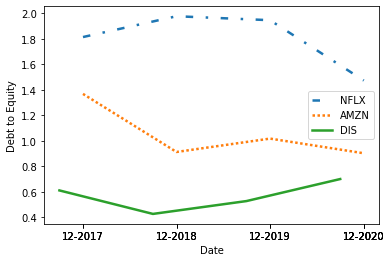

In [234]:
plt.plot(df_joined['asOfDate'],df_joined['Debt/Equity'], label = t1.upper(), linestyle = (0, (3, 5, 1, 5)),linewidth = 2.5)
plt.plot(df_joined2['asOfDate'],df_joined2['Debt/Equity'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(df_joined3['asOfDate'],df_joined3['Debt/Equity'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Debt to Equity')
plt.xticks(df_joined['asOfDate'],df_joined['Date'])
plt.show()

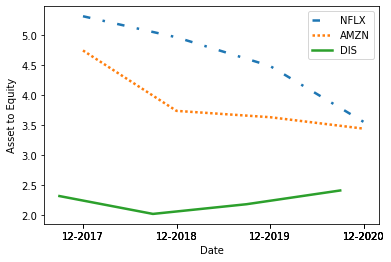

In [235]:
plt.plot(df_joined['asOfDate'],df_joined['Asset/Equity'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)), linewidth = 2.5)
plt.plot(df_joined2['asOfDate'],df_joined2['Asset/Equity'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(df_joined3['asOfDate'],df_joined3['Asset/Equity'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Asset to Equity')
plt.xticks(df_joined['asOfDate'],df_joined['Date'])
plt.show()

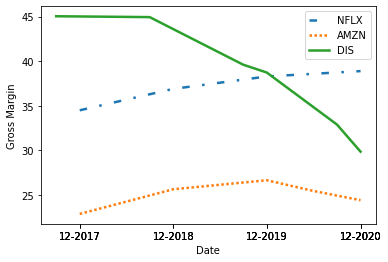

In [236]:
plt.plot(df_joined['asOfDate'],df_joined['Gross_Margin'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)), linewidth = 2.5)
plt.plot(df_joined2['asOfDate'],df_joined2['Gross_Margin'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(df_joined3['asOfDate'],df_joined3['Gross_Margin'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Gross Margin')
plt.xticks(df_joined['asOfDate'],df_joined['Date'])
plt.show()

In [237]:
#Format the date for graphing
#ticker_income['Date'] = ticker_income['asOfDate'].dt.strftime('%m-%Y')
#ticker_income2['Date'] = ticker_income2['asOfDate'].dt.strftime('%m-%Y')
#ticker_income3['Date'] = ticker_income3['asOfDate'].dt.strftime('%m-%Y')

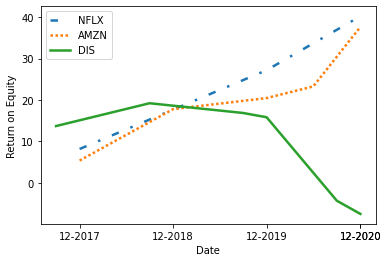

In [238]:
plt.plot(ticker_income['asOfDate'],ticker_income['ROE'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)), linewidth = 2.5)
plt.plot(ticker_income2['asOfDate'],ticker_income2['ROE'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(ticker_income3['asOfDate'],ticker_income3['ROE'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Return on Equity')
plt.xticks(ticker_income['asOfDate'],ticker_income['Date'])
plt.show()

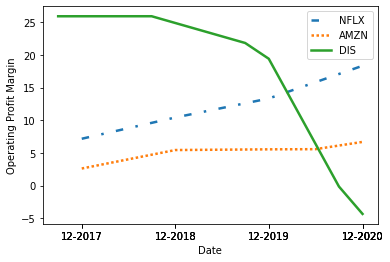

In [239]:
plt.plot(df_joined['asOfDate'],df_joined['Operating_Margin'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)), linewidth = 2.5)
plt.plot(df_joined2['asOfDate'],df_joined2['Operating_Margin'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(df_joined3['asOfDate'],df_joined3['Operating_Margin'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Operating Profit Margin')
plt.xticks(df_joined['asOfDate'],df_joined['Date'])
plt.show()

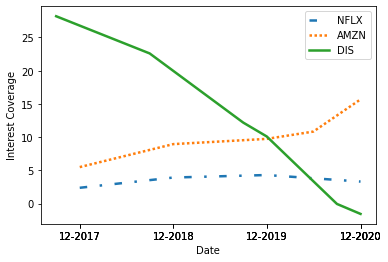

In [240]:
plt.plot(df_joined['asOfDate'],df_joined['Interest_coverage'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)), linewidth = 2.5)
plt.plot(df_joined2['asOfDate'],df_joined2['Interest_coverage'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(df_joined3['asOfDate'],df_joined3['Interest_coverage'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Interest Coverage')
plt.xticks(df_joined['asOfDate'],df_joined['Date'])
plt.show()

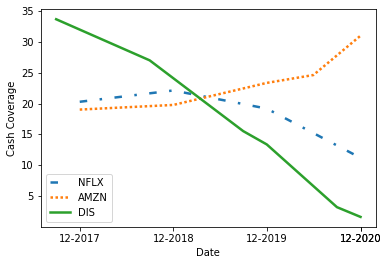

In [241]:
plt.plot(ticker_income['asOfDate'],ticker_income['Cash_coverage'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)), linewidth = 2.5)
plt.plot(ticker_income2['asOfDate'],ticker_income2['Cash_coverage'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(ticker_income3['asOfDate'],ticker_income3['Cash_coverage'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cash Coverage')
plt.xticks(ticker_income['asOfDate'],ticker_income['Date'])
plt.show()

In [242]:
#ticker_Bal['Date'] = ticker_Bal['asOfDate'].dt.strftime('%m-%Y')
#ticker_Bal2['Date'] = ticker_Bal2['asOfDate'].dt.strftime('%m-%Y')
#ticker_Bal3['Date'] = ticker_Bal3['asOfDate'].dt.strftime('%m-%Y')

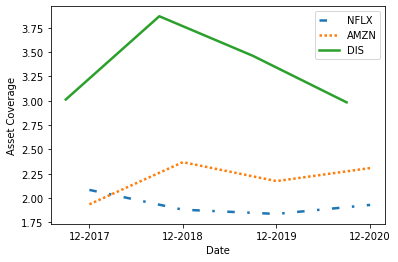

In [243]:
plt.plot(ticker_Bal['asOfDate'],ticker_Bal['Asset_coverage'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)), linewidth = 2.5)
plt.plot(ticker_Bal2['asOfDate'],ticker_Bal2['Asset_coverage'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(ticker_Bal3['asOfDate'],ticker_Bal3['Asset_coverage'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Asset Coverage')
plt.xticks(ticker_Bal['asOfDate'],ticker_Bal['Date'])
plt.show()

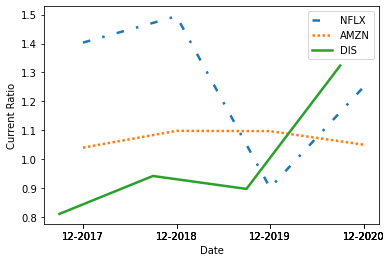

In [244]:
plt.plot(df_joined['asOfDate'],df_joined['Current_ratio'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)), linewidth = 2.5)
plt.plot(df_joined2['asOfDate'],df_joined2['Current_ratio'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(df_joined3['asOfDate'],df_joined3['Current_ratio'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Current Ratio')
plt.xticks(df_joined['asOfDate'],df_joined['Date'])
plt.show()

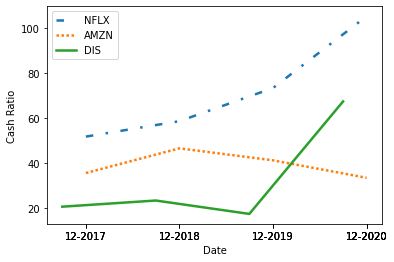

In [245]:
plt.plot(df_joined['asOfDate'],df_joined['Cash_ratio'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)),linewidth = 2.5)
plt.plot(df_joined2['asOfDate'],df_joined2['Cash_ratio'], label = t2.upper(),linestyle = (0, (1, 1)), linewidth = 2.5)
plt.plot(df_joined3['asOfDate'],df_joined3['Cash_ratio'], label = t3.upper(), linewidth = 2.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cash Ratio')
plt.xticks(df_joined['asOfDate'],df_joined['Date'])
plt.show()

In [246]:
ticker1_price = ticker.history()
ticker2_price = ticker2.history()
ticker3_price = ticker3.history()
#print(ticker1_price['open'].tail(),ticker2_price['open'].tail(),ticker3_price['open'].tail())

In [247]:
#It tells you how many dollars you must pay for each dollar of annual earnings.
ticker1_EPS = ticker_income['DilutedEPS'].head(3).tail(1)
ticker2_EPS = ticker_income2['DilutedEPS'].head(3).tail(1)
ticker3_EPS = ticker_income3['DilutedEPS'].head(3).tail(1)

ticker1_price['roll_PE'] = ticker1_price['open']/ ticker1_EPS 
ticker2_price['roll_PE'] = ticker2_price['open']/ ticker2_EPS
ticker3_price['roll_PE'] = ticker3_price['open']/ ticker3_EPS
print(ticker1_price['roll_PE'].tail(6),ticker2_price['roll_PE'].tail(6),ticker3_price['roll_PE'].tail(6))


symbol  date      
nflx    2021-03-04    126.271186
        2021-03-05    123.966104
        2021-03-08    124.566591
        2021-03-09    122.835350
        2021-03-10    124.334140
        2021-03-11    124.020585
Name: roll_PE, dtype: float64 symbol  date      
amzn    2021-03-04    130.899609
        2021-03-05    130.595393
        2021-03-08    131.029987
        2021-03-09    131.159930
        2021-03-10    134.656669
        2021-03-11    134.898306
Name: roll_PE, dtype: float64 symbol  date      
dis     2021-03-04    28.599397
        2021-03-05    28.486445
        2021-03-08    29.715361
        2021-03-09    30.149097
        2021-03-10    29.715361
        2021-03-11    29.725904
Name: roll_PE, dtype: float64
